In [1]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [2]:
d2l.use_svg_display()

### Loading the dataset

In [3]:
class FashionMNIST(d2l.DataModule): #@save
    def __init__(self, batch_size = 64, resize=(28,28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(root=self.root, train = True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(root=self.root, train=False, transform=trans, download = True)
        

In [4]:
data = FashionMNIST()
print(len(data.train), len(data.val))

60000 10000


In [5]:
data.train[0][0].shape

torch.Size([1, 28, 28])

In [6]:
@d2l.add_to_class(FashionMNIST) #@save
def get_dataloader(self,train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train, num_workers=self.num_workers)


In [7]:
X,y = next(iter(data.get_dataloader(train=True)))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 28, 28]) torch.float32 torch.Size([64]) torch.int64


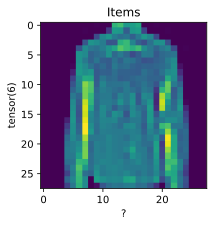

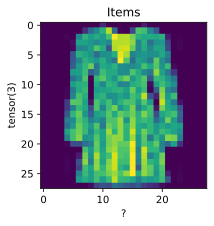

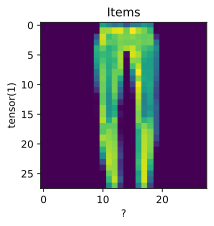

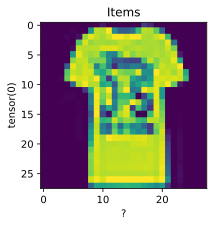

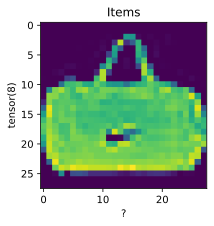

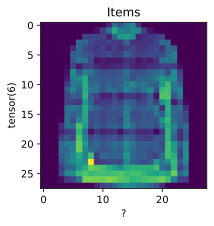

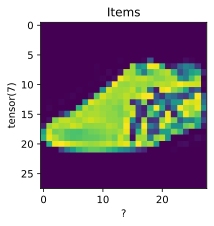

In [10]:
# for X,y in data.get_dataloader(train=True):
index = 0
for X_i in X:
    plt.figure(figsize=(4,3))
    plt.ylabel(y[index])
    plt.xlabel("?")
    plt.title("Items")
    plt.imshow(X_i.view(28,28))
    index += 1
    if index % 7 ==0:
        break